In [1]:
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.image import imread
from skimage import io
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from tensorflow.keras.applications.resnet import ResNet152, preprocess_input, decode_predictions, ResNet50
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, Activation, Input, Conv2D, MaxPooling2D, BatchNormalization
import random
import os
import glob
import shutil
import PIL

%matplotlib inline


In [2]:
pwd

'c:\\Users\\tr_co\\OneDrive\\Masaüstü\\Techpro_Education\\Deep_Learning\\Proje\\CNN_Flowers'

In [3]:
my_data = "Flowers_train"

In [4]:
os.listdir(my_data) 

['train']

In [5]:
train_path = my_data+'/train/'

In [6]:
os.listdir(train_path)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [7]:
os.listdir(train_path+'daisy')[:30]

['100080576_f52e8ee070_n.jpg',
 '10140303196_b88d3d6cec.jpg',
 '10172379554_b296050f82_n.jpg',
 '10172567486_2748826a8b.jpg',
 '102841525_bd6628ae3c.jpg',
 '1031799732_e7f4008c03.jpg',
 '10391248763_1d16681106_n.jpg',
 '10437754174_22ec990b77_m.jpg',
 '10437929963_bc13eebe0c.jpg',
 '10466290366_cc72e33532.jpg',
 '10466558316_a7198b87e2.jpg',
 '10555749515_13a12a026e.jpg',
 '10555815624_dc211569b0.jpg',
 '10559679065_50d2b16f6d.jpg',
 '105806915_a9c13e2106_n.jpg',
 '10712722853_5632165b04.jpg',
 '107592979_aaa9cdfe78_m.jpg',
 '10770585085_4742b9dac3_n.jpg',
 '10841136265_af473efc60.jpg',
 '10993818044_4c19b86c82.jpg',
 '10994032453_ac7f8d9e2e.jpg',
 '11023214096_b5b39fab08.jpg',
 '11023272144_fce94401f2_m.jpg',
 '11023277956_8980d53169_m.jpg',
 '11124324295_503f3a0804.jpg',
 '1140299375_3aa7024466.jpg',
 '11439894966_dca877f0cd.jpg',
 '1150395827_6f94a5c6e4_n.jpg',
 '11642632_1e7627a2cc.jpg',
 '11834945233_a53b7a92ac_m.jpg']

In [8]:
os.listdir(train_path+'daisy')[17]

'10770585085_4742b9dac3_n.jpg'

In [9]:
para_cell = train_path+'daisy'+'/10770585085_4742b9dac3_n.jpg'

In [10]:
imread(para_cell) # " imread "  görüntünün piksel değerlerini içeren numpy array şeklinde getirir

array([[[116, 130,  45],
        [108, 126,  42],
        [103, 128,  45],
        ...,
        [  0, 148,   1],
        [  0, 147,   1],
        [  2, 146,   0]],

       [[116, 129,  47],
        [110, 129,  47],
        [103, 132,  48],
        ...,
        [  0, 150,   3],
        [  0, 148,   2],
        [  0, 146,   0]],

       [[117, 130,  50],
        [112, 134,  52],
        [105, 139,  55],
        ...,
        [  1, 151,   2],
        [  0, 148,   2],
        [  0, 146,   0]],

       ...,

       [[ 42,  69,   0],
        [ 50,  78,   4],
        [ 53,  80,   1],
        ...,
        [  1,  70,   3],
        [  1,  72,   2],
        [  2,  73,   3]],

       [[ 41,  67,   4],
        [ 47,  74,   7],
        [ 47,  75,   1],
        ...,
        [  2,  76,   1],
        [  0,  76,   1],
        [  0,  76,   1]],

       [[ 38,  64,   3],
        [ 43,  69,   6],
        [ 42,  69,   0],
        ...,
        [  3,  80,   0],
        [  0,  79,   0],
        [  0,  78,   0]]

In [11]:
para_img= imread(para_cell)

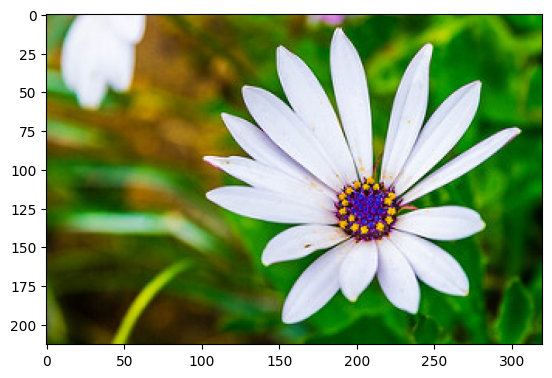

In [12]:
plt.imshow(para_img)

In [13]:
para_img.shape

(213, 320, 3)

In [14]:
os.listdir(train_path+'dandelion')[:20]

['10043234166_e6dd915111_n.jpg',
 '10200780773_c6051a7d71_n.jpg',
 '10294487385_92a0676c7d_m.jpg',
 '10437652486_aa86c14985.jpg',
 '10443973_aeb97513fc_m.jpg',
 '10486992895_20b344ce2d_n.jpg',
 '10617162044_8740d4dd9f_n.jpg',
 '10617191174_9a01753241_n.jpg',
 '1074999133_1e4a1e042e.jpg',
 '10777398353_5a20bb218c.jpg',
 '10778387133_9141024b10.jpg',
 '10779476016_9130714dc0.jpg',
 '10828951106_c3cd47983f.jpg',
 '10919961_0af657c4e8.jpg',
 '10946896405_81d2d50941_m.jpg',
 '11124381625_24b17662bd_n.jpg',
 '11296320473_1d9261ddcb.jpg',
 '11465213433_847c4fa261.jpg',
 '11545123_50a340b473_m.jpg',
 '11768468623_9399b5111b_n.jpg']

In [15]:
dandelion_cell_path = train_path+'dandelion/'+os.listdir(train_path+'dandelion')[7]


In [16]:
dandelion_cell_path

'Flowers_train/train/dandelion/10617191174_9a01753241_n.jpg'

In [17]:
imread(dandelion_cell_path)

array([[[ 46,  32,   6],
        [ 23,  14,   0],
        [ 13,  10,   1],
        ...,
        [ 45,  74,  30],
        [ 41,  69,  21],
        [ 45,  74,  18]],

       [[ 33,  39,  27],
        [ 18,  28,   3],
        [ 26,  40,   7],
        ...,
        [ 45,  73,  24],
        [ 47,  74,  29],
        [ 59,  86,  43]],

       [[ 89, 112,  66],
        [ 48,  68,  40],
        [ 13,  26,  16],
        ...,
        [ 53,  78,  36],
        [ 58,  84,  37],
        [ 66,  93,  42]],

       ...,

       [[ 76, 104,  53],
        [ 53,  77,  25],
        [ 29,  52,   0],
        ...,
        [ 62,  79,  27],
        [ 69,  82,  36],
        [ 71,  82,  39]],

       [[ 56,  84,  26],
        [ 50,  74,  22],
        [ 31,  50,   5],
        ...,
        [ 55,  74,  19],
        [ 61,  79,  27],
        [ 60,  76,  29]],

       [[ 52,  76,  28],
        [ 68,  89,  48],
        [ 11,  26,   0],
        ...,
        [ 50,  71,  14],
        [ 60,  81,  25],
        [ 62,  80,  30]]

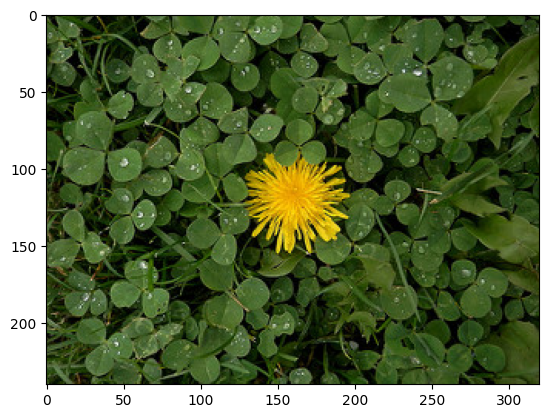

In [18]:
dandelion = imread(dandelion_cell_path)
plt.imshow(dandelion)

In [19]:
# Veri klasörü yolu
data_dir = "C:\\Users\\tr_co\\OneDrive\\Masaüstü\\Techpro_Education\\Deep_Learning\\Proje\\CNN_Flowers\\Flowers_train\\train"

# Bitki türleri
plant_types = ["dandelion", "daisy", "roses", "sunflowers", "tulips"]

# Her bir bitki türü için boş liste oluştur
daisy = []
dandelion = []
roses = []
sunflowers = []
tulips = []

# Her bir bitki türü için dosya sayısını hesaplayın
for plant_type in plant_types:
    # Bitki türü klasöründeki dosya sayısını alın
    file_list = os.listdir(os.path.join(data_dir, plant_type))
    
    # Her bir dosyayı ilgili listeye ekleyin
    if plant_type == "daisy":
        daisy.extend(file_list)
    elif plant_type == "dandelion":
        dandelion.extend(file_list)
    elif plant_type == "roses":
        roses.extend(file_list)
    elif plant_type == "sunflowers":
        sunflowers.extend(file_list)
    elif plant_type == "tulips":
        tulips.extend(file_list)
    
    # Dosya sayısını yazdırın
    print(f"Number of {plant_type} images:", len(file_list))


Number of dandelion images: 718
Number of daisy images: 506
Number of roses images: 512
Number of sunflowers images: 559
Number of tulips images: 639


In [20]:
# Veri klasörü yolu
data_dir = "C:\\Users\\tr_co\\OneDrive\\Masaüstü\\Techpro_Education\\Deep_Learning\\Proje\\CNN_Flowers\\Flowers_train\\train"

# Bitki türleri
plant_types = ["dandelion", "daisy", "roses", "sunflowers", "tulips"]

# Her bir bitki türü için boş liste oluştur
daisy = []
dandelion = []
roses = []
sunflowers = []
tulips = []

# Her bir bitki türü için dosya sayısını hesaplayın
for plant_type in plant_types:
    # Bitki türü klasöründeki dosya sayısını alın
    file_list = os.listdir(os.path.join(data_dir, plant_type))
    
    # Her bir dosyayı ilgili listeye ekleyin
    if plant_type == "daisy":
        daisy.append(file_list)
    elif plant_type == "dandelion":
        dandelion.append(file_list)
    elif plant_type == "roses":
        roses.append(file_list)
    elif plant_type == "sunflowers":
        sunflowers.append(file_list)
    elif plant_type == "tulips":
        tulips.append(file_list)
    
    # Dosya sayısını yazdırın
    print(f"Number of {plant_type} images:", len(file_list))


Number of dandelion images: 718
Number of daisy images: 506
Number of roses images: 512
Number of sunflowers images: 559
Number of tulips images: 639


In [21]:
import os

# Veri klasörü yolu
data_dir = "C:\\Users\\tr_co\\OneDrive\\Masaüstü\\Techpro_Education\\Deep_Learning\\Proje\\CNN_Flowers\\Flowers_train\\train"

# Bitki türleri
plant_types = ["dandelion", "daisy", "roses", "sunflowers", "tulips"]

# Her bir bitki türü için boş liste oluştur
daisy = []
dandelion = []
roses = []
sunflowers = []
tulips = []

# Her bir bitki türü için dosya sayısını hesaplayın ve dosya isimlerini ilgili listeye ekleyin
for plant_type in plant_types:
    # Bitki türü klasöründeki dosya sayısını alın
    file_list = os.listdir(os.path.join(data_dir, plant_type))
    
    # Her bir dosyayı ilgili listeye ekleyin
    if plant_type == "daisy":
        daisy.extend(file_list)
    elif plant_type == "dandelion":
        dandelion.extend(file_list)
    elif plant_type == "roses":
        roses.extend(file_list)
    elif plant_type == "sunflowers":
        sunflowers.extend(file_list)
    elif plant_type == "tulips":
        tulips.extend(file_list)
    
    # Dosya sayısını yazdırın
    print(f"Number of {plant_type} images:", len(file_list))

# Her bitki türü için listenin uzunluğunu hesaplayın
total_length = 0
for plant_list in [daisy, dandelion, roses, sunflowers, tulips]:
    total_length += len(plant_list)

# Toplam sayıyı bulun
total_plants = len(plant_types)

# Her bir grup için ortalama uzunluğu hesaplayın
daisy_average = len(daisy) / total_plants
dandelion_average = len(dandelion) / total_plants
roses_average = len(roses) / total_plants
sunflowers_average = len(sunflowers) / total_plants
tulips_average = len(tulips) / total_plants

print("------------------------:")

# Her bir grup için ortalama uzunluğu yazdırın
print("Daisy average:", daisy_average)
print("Dandelion average:", dandelion_average)
print("Roses average:", roses_average)
print("Sunflowers average:", sunflowers_average)
print("Tulips average:", tulips_average)


Number of dandelion images: 718
Number of daisy images: 506
Number of roses images: 512
Number of sunflowers images: 559
Number of tulips images: 639
------------------------:
Daisy average: 101.2
Dandelion average: 143.6
Roses average: 102.4
Sunflowers average: 111.8
Tulips average: 127.8


ortalamalara baktığımızda 

Average length: 586.8

Daisy average: 101.2

Dandelion average: 143.6

Roses average: 102.4

Sunflowers average: 111.8

Tulips average: 127.8

ortak br shape belirlemek için yaptık. 

Daha yüksek de seçilebiliriz ama işlem hacmi artacaktır. zaman ve donanıma bağlı olarak Best practice yaklaşım sergileyebiliriz 

In [22]:
image_shape = (140,140,3)

In [23]:
variables = [daisy, dandelion, roses, sunflowers, tulips]
for var_name, var in zip(["daisy", "dandelion", "roses", "sunflowers", "tulips"], variables):
    max_val = max(var)    
    print(f"Maksimum değer for {var_name}: {max_val}")


Maksimum değer for daisy: 99306615_739eb94b9e_m.jpg
Maksimum değer for dandelion: 9965757055_ff01b5ee6f_n.jpg
Maksimum değer for roses: 99383371_37a5ac12a3_n.jpg
Maksimum değer for sunflowers: 9904127656_f76a5a4811_m.jpg
Maksimum değer for tulips: 9976515506_d496c5e72c.jpg


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
image_gen = ImageDataGenerator(rotation_range=15, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255,
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest')

In [26]:
para_img.shape

(213, 320, 3)

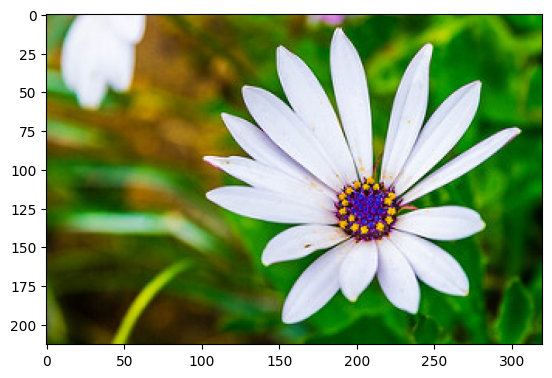

In [27]:
plt.imshow(para_img)

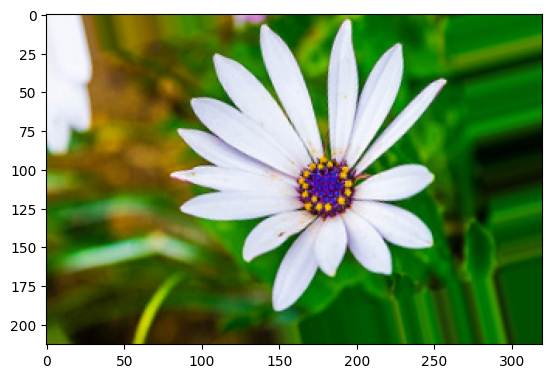

In [28]:
plt.imshow(image_gen.random_transform(para_img))

In [29]:
image_gen.flow_from_directory(train_path)

Found 2934 images belonging to 5 classes.


# Creating the Model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [31]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

C:\Users\tr_co\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 140, 140, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 70, 70, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 70, 70, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 70, 70, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 35, 35, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 35, 35, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 39200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,508,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,514,017 (9.59 MB)

 Trainable params: 2,514,017 (9.59 MB)

 Non-trainable params: 0 (0.00 B)

## Early Stopping

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

## Training the Model

In [35]:
batch_size = 32
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(140,140),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary', shuffle=True, seed=42)

Found 2934 images belonging to 5 classes.


In [36]:
train_image_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [37]:
test_path = 'Flowers_test'+'/test/'

In [38]:
os.listdir(test_path)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [39]:
image_gen.flow_from_directory(test_path)

Found 736 images belonging to 5 classes.


In [40]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=(140,140),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary', shuffle=True, seed=42)

Found 736 images belonging to 5 classes.


In [41]:
results = model.fit(train_image_gen,epochs=10,
                    validation_data=test_image_gen,
                    callbacks=[early_stop])

Epoch 1/10


C:\Users\tr_co\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 57s 566ms/step - accuracy: 0.2330 - loss: -34319.8789 - val_accuracy: 0.2446 - val_loss: -1063495.6250
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 31s 321ms/step - accuracy: 0.2386 - loss: -4547581.0000 - val_accuracy: 0.2446 - val_loss: -30072596.0000
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 31s 318ms/step - accuracy: 0.2486 - loss: -58996624.0000 - val_accuracy: 0.2446 - val_loss: -198988864.0000
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 31s 319ms/step - accuracy: 0.2463 - loss: -299861280.0000 - val_accuracy: 0.2446 - val_loss: -712923072.0000
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 32s 330ms/step - accuracy: 0.2481 - loss: -994068224.0000 - val_accuracy: 0.2446 - val_loss: -1855437184.0000
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 32s 331ms/step - accuracy: 0.2528 - loss: -2394802432.0000 - val_accuracy: 0.2446 - val_loss: -3977410048.0000
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 33s 339ms/step - accuracy: 0.2408 - loss: -4919676928.0000 - val_accuracy: 0.2446 - val_loss: -752